**This Project aims to replicate the bias/variances figures 4.5 and 4.6 in section 4.7 of Alpaydin, deepening the understanding of bias and variance.**


**Replicate figures 4.5 in section 4.7 of Alpyadin 4th edition**

In [21]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**The ground thruth function for the regression is f(x) = 3 cos(2x)**

**Generate 100 sample datasets with f(x) + Gaussian white noise (N(0,1)). Each dataset will have 20 points randomly selected x from [0,5] with corresponding target points.**

In [22]:
# Ground truth target function
def f(x):
    return 3 * np.cos(1.3 * x)

# seed
np.random.seed(62)
# x
x = np.random.uniform(0.0, 5.0, [100, 20])
x = np.sort(x)

# Ground truth targets
g = f(x)
# Add white noise
noisy = np.random.normal(0, 1, [100, 20])
# y
y = g + noisy

# use linspace(0,5,100) as test set to plot the images
x_test = np.linspace(0,5,100)

<strong>TODO: Use the First 5 datasets to generate 4 plots.</strong>
 - Figure one: Function f(x) = 3 cos(2x) and one noisy dataset sampled from the function, namely "Function, and data".
 - Figure two: Generate five polynomial fits of degree ONE based on the first five datasets and name this figure with "Order 1"
 - Figure three: Generate five polynomial fits of degree THREE based on the first five datasets and name this figure with "Order 3"
 - Figure four: Generate five polynomial fits of degree FIVE based on the first five datasets and name this figure with "Order 5"
 - For figures two, three, and four, please add a dotted line as an average line for the five fits.
  
  
<b> Please use x_test to plot all the model functions, not just the ground truth function. This will make all the higher polynomial models look smoother. </b>

<br>

<strong>Hint: You can use the Sklearn’s PolynomialFeatures and LinearRegression. </storng>
- https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

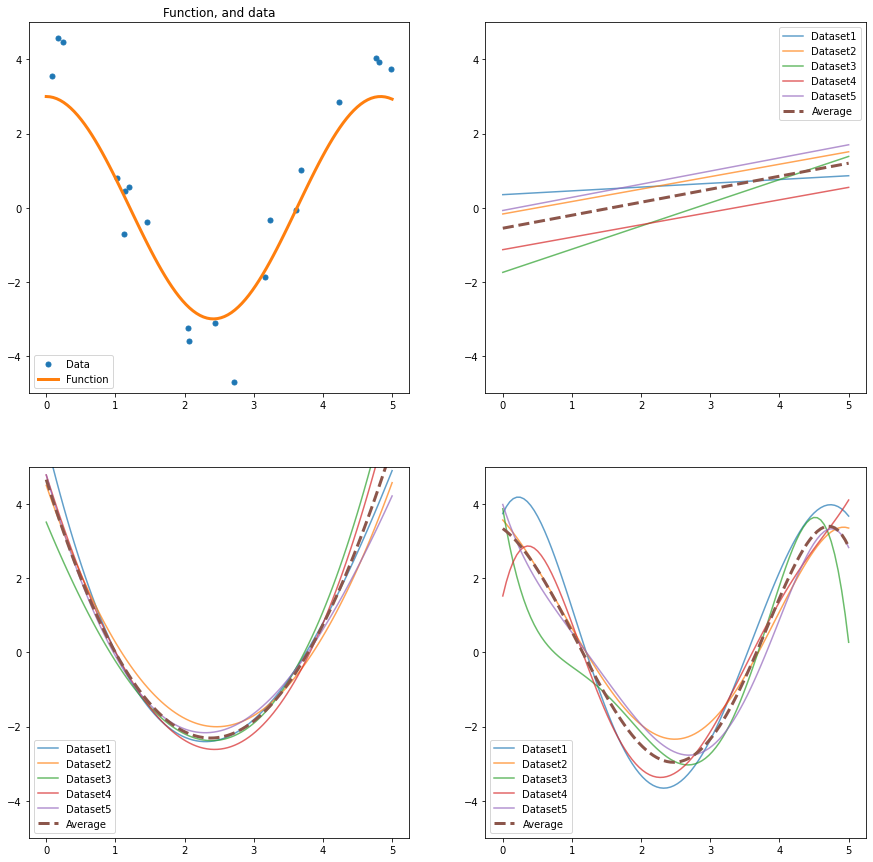

In [24]:
# model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def linear_model_predict(X, Y, order):
    # fit one polynomial model of degree `order`
    model = Pipeline([('poly' , PolynomialFeatures(degree = order)) , ('linear' , LinearRegression(fit_intercept=False))])
    # model = model.fit(X[: , np.newaxis] , Y)
    model = model.fit(X.reshape(-1,1),Y)
    return model

def plot_figure(x, y, x_test, order):
    models = [linear_model_predict(x[i], y[i], order) for i in range(5)]
    # for i,model in [[i,models[i]] for i in range(5)]:
    y_preds = [model.predict(x_test.reshape(-1,1)) for model in models]
    y_avg = np.mean(y_preds, axis=0)

    for i in range(5):
        plt.plot(x_test, y_preds[i], '-', alpha=0.7,label = 'Dataset'+str(i+1))
        plt.legend()
    plt.plot(x_test,y_avg, '--', linewidth=3, label='Average')
    plt.legend()
    
# show the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))


# figure one
plt.subplot(2, 2, 1)
plt.title("Function, and data")
plt.ylim(-5, 5)
plt.plot(x[0], y[0], 'o', markersize=5, label='Data')
plt.plot(x_test, f(x_test), '-', linewidth=3, label='Function')
plt.legend()

# figure two
plt.subplot(2, 2, 2)
plt.ylim(-5, 5)
plot_figure(x, y, x_test, order=1)

# figure three
plt.subplot(2, 2, 3)
plt.ylim(-5, 5)
plot_figure(x, y, x_test, order=3)

# figure four
plt.subplot(2, 2, 4)
plt.ylim(-5, 5)
plot_figure(x, y, x_test, order=5)



**TODO: Generate Figure 4.6 from Alpaydin 4th Edition**

**The x-axis is the order of polynomial model, from 1 to 5. the y-axis is the error. The plot should contain three curves: total error, bias error and variance error.**

**Use all 100 dataset to compute the total error, bias error and variance error functions by using total error equation (4.36): $Ex[(E[r|x]-g(x))^2|x] = (E[r|x]) - E_X(g(x))^2 + E_X[(g(x)-E_X[g(x)])^2]$**

**Evaluate each of the three error functions with 10 equally spaced values starting from 0 and ending at 5, i.e. np.linspace(0, 5, 10)**

**TODO: For each of the five polynomial models, print the average predictions, $E_X[g(x)]$, at np.linspace(0, 5, 10)**

**Hint: Average prediction at point x means computing the average value of the predictions of 100 models generated by 100 datasets. The point x should range from np.linspace(0, 5, 10)**


**TODO: Generate and print a DataFrame with 5 rows, one for each order and 4 columns. The 4 columns are:**
 * **Order**
 * **Bias error**
 * **Variance error**
 * **Total error**


**Hint: Average prediction at point x means computing the average value of the predictions of 100 models generated by 100 datasets. The point x should range from np.linspace(0, 5, 10)**

**Hint: For bias error $(E[r|x]) - E_X(g(x))^2$, $E[r|x] = f(x)$ and $E_X[g(x)]$ is the average over 100 models from the 100 datasets. Then, you can approximate bias error by average over x in np.linspace(0, 5, 10) of $(E[r|x] - E_X[g(x)])2$.**

**Hint: For For variance error, you need to have a nested loops (for each dataset and for  x in np.linespace(0, 5, 10))  to get the average variance error.**

**Hint: The total error is the sum of bias error and variance error.**



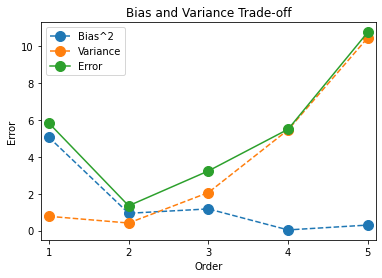

In [28]:
def bias_error(avg_pred, x_eval):
    # For each polynomial order, computes its bias error
    # returns a list of length 5
    five_bias = []
    for degree_preds in avg_pred:
      bias_error = np.mean((degree_preds - f(x_eval)) ** 2)
      five_bias.append(bias_error) 
    return five_bias

def variance_error(avg_pred, models_evals):
    # For each polynomial order, computes its variance error
    # returns a list of length 5
    five_variance = []
    five_variance = np.var(models_evals_list, axis=1).mean(1)
    # print(five_variance)
    return five_variance


# Fit 5 * 100 models, i.e. fit 100 models for each degree in range(1, 6).
# The shape of models_list is (5, 100)
models_list = []
for degree in range(1, 6):
    degree_models = []
    for i in range(100):
        model = linear_model_predict(x[i], y[i], degree) 
        degree_models.append(model)
    models_list.append(degree_models)


# create evaluation x data 
x_eval = np.linspace(0, 5, 10)

# Evaluate each of the 5 * 100 models on `x_eval`
# The shape of models_evals_list is (5,100,10) which is 5 degree with 100 models and each model predict the 10 x evaluation
models_evals_list = []

for degree_models in models_list:
    degree_evals = []
    for model in degree_models:
        degree_evals.append(model.predict(x_eval.reshape(-1,1)))
    models_evals_list.append(degree_evals)


# For each degree compute the average predictiona at `x_eval`
# The shape `ave_preds_list` isis (5,10) 
avg_preds_list = []

avg_preds_list = np.array(models_evals_list).mean(1)


bias_lst = bias_error(avg_preds_list, x_eval)

variance_lst = variance_error(avg_preds_list, models_evals_list)

total_error = [x + y for x, y in zip(bias_lst, variance_lst)]

# show the plot
x_points = [1,2,3,4,5]

plt.plot(x_points, bias_lst, linestyle='dashed',label = "Bias^2", marker='o', markersize=10)
plt.plot(x_points, variance_lst, linestyle='dashed', label = "Variance", marker='o', markersize=10)
plt.plot(x_points, total_error, linestyle='solid', label = "Error", marker='o', markersize=10)
plt.legend()
plt.xlim(0.9, 5.1)
plt.xticks(np.linspace(1, 5, 5))
plt.xlabel("Order")
plt.ylabel("Error")
plt.title("Bias and Variance Trade-off")
# Display graph
plt.show()

In [19]:
# Error DataFrame
pd.set_option("display.precision", 3)
error_df = pd.DataFrame({
    'Order': range(1,6),
    'Bias Error': bias_lst,
    'Variance Error': variance_lst,
    'Total Error': total_error
})
error_df

,Order,Bias Error,Variance Error,Total Error
0,1,5.058,0.771,5.829
1,2,0.935,0.407,1.343
2,3,1.173,2.060,3.233
3,4,0.033,5.462,5.495
4,5,0.296,10.464,10.760


In [20]:
# Average predictions
pd.set_option("display.precision", 3)
pd.DataFrame(avg_preds_list)

,0,1,2,3,4,5,6,7,8,9
0,-0.326,-0.263,-0.199,-0.136,-0.073,-0.009,0.054,0.118,0.181,0.244
1,4.459,1.772,-0.225,-1.533,-2.150,-2.078,-1.315,0.137,2.279,5.111
2,5.177,2.027,-0.236,-1.655,-2.271,-2.126,-1.261,0.280,2.457,5.227
3,2.983,2.550,0.504,-1.631,-2.857,-2.706,-1.240,0.951,2.748,2.502
4,1.324,2.121,0.442,-1.638,-2.860,-2.690,-1.219,0.924,2.673,2.612
